In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
# Step 1 Data Processing

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist", one_hot=True)

X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models

In [4]:
# Step 2 Define Model

L1=200
L2=100
L3=50

model = Sequential()
model.add(Dense(L1,input_dim=784,activation='relu'))
model.add(Dense(L2,activation='relu'))
model.add(Dense(L3,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 182,660
Trainable params: 182,660
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Step 3: Compile Model
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
# Step 4: Train the Model
model.fit(X_train,y_train,epochs=10,batch_size=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
55000/55000 [==============================] - 6s 116us/step - loss: 0.2965 - acc: 0.9142
Epoch 2/10
55000/55000 [==============================] - 2s 37us/step - loss: 0.1151 - acc: 0.9648
Epoch 3/10
55000/55000 [==============================] - 2s 36us/step - loss: 0.0787 - acc: 0.9758
Epoch 4/10
55000/55000 [==============================] - 2s 37us/step - loss: 0.0573 - acc: 0.9826
Epoch 5/10
55000/55000 [==============================] - 2s 38us/step - loss: 0.0457 - acc: 0.9851
Epoch 6/10
55000/55000 [==============================] - 2s 37us/step - loss: 0.0356 - acc: 0.9889
Epoch 7/10
55000/55000 [==============================] - 2s 36us/step - loss: 0.0283 - acc: 0.9908
Epoch 8/10
55000/55000 [==============================] - 2s 38us/step - loss: 0.0233 - acc: 0.9926
Epoch 9/10
55000/55000 [==============================] - 2s 39us/step - loss: 0.0211 - acc: 0.9926
Epoc

In [8]:
# Step 5: Evaluate the Model
loss, acc = model.evaluate(X_test,y_test)
acc

10000/10000 [==============================] - 0s 37us/step


0.9753

In [0]:
saved_path = 'mnist_nn.h5'

In [0]:
model.save(saved_path)

In [11]:
# Step 7: Load Model & Predict
from keras.models import load_model
model = load_model(saved_path)
prediction = model.predict(X_test)
prediction

array([[1.0553245e-07, 4.9748257e-07, 4.9896808e-08, ..., 9.9999416e-01,
        4.5884313e-08, 2.3130376e-06],
       [8.0040488e-12, 7.7390296e-06, 9.9990225e-01, ..., 6.7957062e-09,
        4.0124331e-08, 4.2866228e-15],
       [4.3639002e-07, 9.9997151e-01, 2.5129639e-06, ..., 2.0227879e-05,
        1.1446231e-06, 1.8742774e-08],
       ...,
       [1.3511161e-09, 8.0521801e-08, 1.5811880e-13, ..., 8.7332261e-08,
        4.2601713e-09, 1.1262342e-05],
       [1.4600238e-07, 3.5964803e-08, 4.2237749e-13, ..., 6.5170473e-11,
        3.7060795e-06, 7.0970813e-11],
       [1.8703854e-11, 1.1048405e-11, 3.6615513e-13, ..., 2.3536706e-15,
        2.2086445e-12, 4.6348808e-13]], dtype=float32)

In [12]:
loss, acc = model.evaluate(X_test,y_test)
acc

10000/10000 [==============================] - 0s 42us/step


0.9753

### Predict Single Image

In [13]:
import numpy as np
index = np.random.randint(1,10000)
X = X_test[index].reshape([-1,784])
prediction = model.predict(X)
print("Predicted Digit : ", prediction.argmax(axis=1))

Predicted Digit :  [5]


In [0]:
import matplotlib.pyplot as plt
def show_digit(index):
    label = y_test[index].argmax(axis=0)
    image = X_test[index].reshape([28,28])
    plt.title('Actual Digit : {}'.format(label))
    plt.imshow(image, cmap='gray_r')
    plt.show()

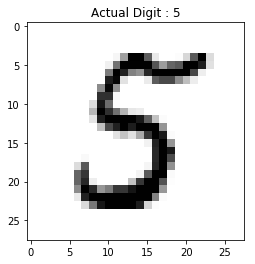

In [17]:
show_digit(index)

## Visualization with Keras

In [0]:
# Step 2 Define Model

L1=200
L2=100
L3=50

model = Sequential()
model.add(Dense(L1,input_dim=784,activation='relu'))
model.add(Dense(L2,activation='relu'))
model.add(Dense(L3,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
# Step 3: Compile Model
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
# Step 4: Train the Model
history = model.fit(X_train,y_train, epochs=10,
                   batch_size=100,
                   validation_data=(X_test,y_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 14s 247us/step - loss: 0.2175 - acc: 0.9350 - val_loss: 0.0945 - val_acc: 0.9706
Epoch 2/10
55000/55000 [==============================] - 13s 239us/step - loss: 0.0872 - acc: 0.9728 - val_loss: 0.0872 - val_acc: 0.9718
Epoch 3/10
51300/55000 [==========================>...] - ETA: 0s - loss: 0.0585 - acc: 0.9819

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [0]:
epochs = range(1,len(acc)+1)

In [0]:
plt.plot(epochs, acc,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

### Ex: Challenge: Keras NN 

In [0]:
# Step 2 Define Model

L1=1024
L2=512
L3=256
L4=128

model = Sequential()
model.add(Dense(L1,input_dim=784,activation='relu'))
model.add(Dense(L2,activation='relu'))
model.add(Dense(L3,activation='relu'))
model.add(Dense(L4,activation='relu'))
model.add(Dense(10,activation='softmax'))